In [7]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.polynomial.legendre as L #using the numpy module to generate the legendre polynomials
from scipy.stats import beta
from scipy.special import lambertw
from helpers_1 import *

finished with reference plots
40  doing with n depending on M
80  doing with n depending on M
160  doing with n depending on M
320  doing with n depending on M
640  doing with n depending on M
1280  doing with n depending on M
2560  doing with n depending on M
40  doing with n depending on M
80  doing with n depending on M
160  doing with n depending on M
320  doing with n depending on M
640  doing with n depending on M
1280  doing with n depending on M
2560  doing with n depending on M


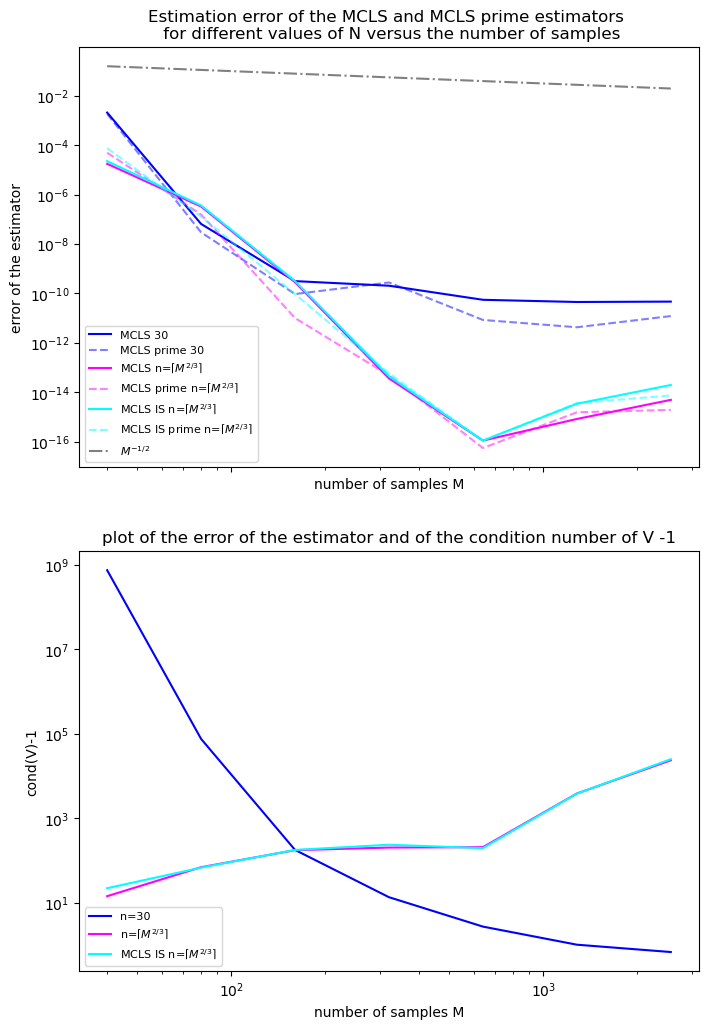

In [5]:
#plot of the MCLS and MCLS prime estimators with importance sampling with the number of Legendre polynomials considered
#depending on the number of samples

fig, ax = plt.subplots(2,figsize= (8,12), sharey = False, sharex = True)

N=[30] #for reference/comparison to the behaviour of ⌈sqrt(M)⌉, ⌈M/2⌉ and ⌈Mlog(M)⌉
M_array=np.array([20*2**i for i in range(1,8)]) 

seed_1=9009
seed_2=1991

sbplt_0 = ax[0] #plot of the estimators
sbplt_1 = ax[1] #plot of the condition number
c=['blue', 'brown']

for i, n in enumerate(N):
    error_function_IMCLS_importance=[]
    error_function_IMCLS_importance_prime=[]
    cond_V_tilde=[]
    
    for m in M_array:
        e_IMCLS_importance, e_IMCLS_importance_prime, c_v_tilde=IMCLS_importance(m, n, seed_1, seed_2)
        cond_V_tilde.append(c_v_tilde-1)
        error_function_IMCLS_importance.append(e_IMCLS_importance)
        error_function_IMCLS_importance_prime.append(e_IMCLS_importance_prime)
  
    sbplt_0.loglog(M_array,error_function_IMCLS_importance, color=c[i], label="MCLS "+str(n))
    sbplt_0.loglog(M_array,error_function_IMCLS_importance_prime, alpha=0.5, color=c[i], linestyle='--', label="MCLS prime "+str(n))
    sbplt_1.loglog(M_array, cond_V_tilde, color=c[i], label='n='+str(n))
    sbplt_0.set_title("Estimation error of the MCLS and MCLS prime estimators \n for different values of N versus the number of samples")
    sbplt_1.set_title("(Condition number of V)-1 versus the number of samples")

print("finished with reference plots")

#plotting the estimation error for n=⌈sqrt(M)⌉ and n=⌈M/2⌉ and n=⌈Mlog(M)⌉

#functions of the number of legendre polynomials, depending on the number of samples
N_func_1=lambda m: int(np.ceil(m**(2/3)))

#doing without importance sampling
                       
err_M=[]
err_M_prime=[]
cond_V_M=[]

for m in M_array:
    e_M, e_M_prime, c_v_M=IMCLS(m, N_func_1(m), seed_1, seed_2)
    
    #storing the error of the estimators
    err_M.append(e_M)
    err_M_prime.append(e_M_prime)
    
    #storing the condition number -1 of the coefficient matrix of the least square problem
    cond_V_M.append(c_v_M-1)
    
    print(m, " doing with n depending on M")

sbplt_0.loglog(M_array, err_M, color="magenta", label='MCLS n=⌈$M^{2/3}$⌉')
sbplt_0.loglog(M_array, err_M_prime, color="magenta", linestyle='--', alpha=0.5, label='MCLS prime n=⌈$M^{2/3}$⌉')
sbplt_1.loglog(M_array, cond_V_M, color="magenta", label="n=⌈$M^{2/3}$⌉")         

#doing with importance sampling

#storing the approximation error of the estimators wrt the number of samples
err_M_importance=[]
err_M_importance_prime=[]

#storing the condition number -1 of the coefficient matrix of the least square problem
cond_V_tilde_M=[]

for m in M_array:
    e_M_importance, e_M_importance_prime, c_v_tilde_M=IMCLS_importance(m, N_func_1(m), seed_1, seed_2)
    
    err_M_importance.append(e_M_importance)
    err_M_importance_prime.append(e_M_importance_prime)
    
    cond_V_tilde_M.append(c_v_tilde_M-1)
    
    print(m, " doing with n depending on M")

sbplt_0.loglog(M_array, err_M_importance, color="cyan", label='MCLS IS n=⌈$M^{2/3}$⌉ ')
sbplt_0.loglog(M_array, err_M_importance_prime, color="cyan", linestyle='--', alpha=0.5, label='MCLS IS prime n=⌈$M^{2/3}$⌉')

sbplt_1.loglog(M_array, cond_V_tilde_M, color="cyan", label='MCLS IS n=⌈$M^{2/3}$⌉')

#ploting O(M^{-1/2})
sbplt_0.loglog(M_array, M_array**-0.5, '-.',color='gray', label = r'$M^{-1/2}$')
        
sbplt_0.legend(loc='lower left', fontsize=8)
sbplt_0.set_xlabel("number of samples M")
sbplt_0.set_ylabel("error of the estimator")

sbplt_1.legend(loc='lower left', fontsize=8)
sbplt_1.set_xlabel("number of samples M")
sbplt_1.set_ylabel("cond(V)-1")

plt.title("plot of the error of the estimator and of the condition number of V -1")
plt.show()
        
fig.tight_layout()

#to save the figures separatly
extent_0 = sbplt_0.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
extent_1 = sbplt_1.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
sbplt_0.figure.savefig("Figures/fixing.png", bbox_inches=extent_0.expanded(1.3, 1.12))
sbplt_1.figure.savefig("Figures/condition_fixing.png", bbox_inches=extent_1.expanded(1.3, 1.12))

finished with reference plots
40  doing with n depending on M


C:\Users\HOURS\AppData\Local\Temp\ipykernel_21804\1299662999.py:38: ComplexWarning: Casting complex values to real discards the imaginary part
  N_func_1=lambda m: int(m/lambertw(m)) #defining N such that M=Nlog(N)


80  doing with n depending on M
160  doing with n depending on M
320  doing with n depending on M
640  doing with n depending on M
1280  doing with n depending on M
2560  doing with n depending on M
40  doing with n depending on M
80  doing with n depending on M
160  doing with n depending on M
320  doing with n depending on M
640  doing with n depending on M
1280  doing with n depending on M
2560  doing with n depending on M


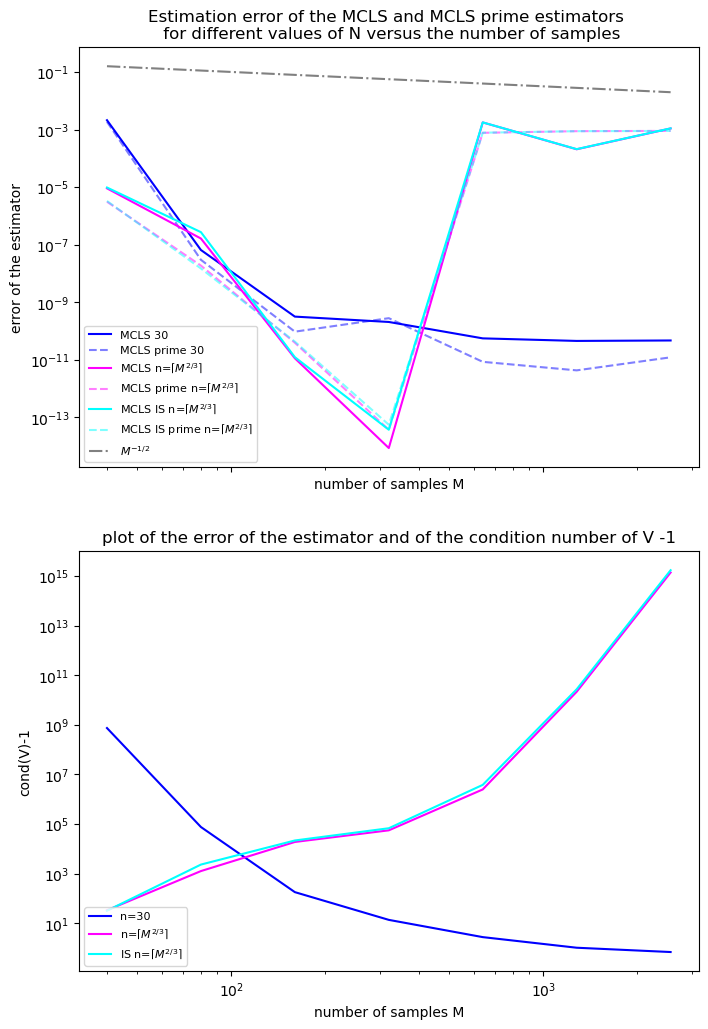

In [8]:
#plot of the MCLS and MCLS prime estimators with importance sampling with the number of Legendre polynomials considered
#depending on the number of samples

fig, ax = plt.subplots(2,figsize= (8,12), sharey = False, sharex = True)

N=[30] #for reference/comparison to the behaviour of ⌈sqrt(M)⌉, ⌈M/2⌉ and ⌈Mlog(M)⌉
M_array=np.array([20*2**i for i in range(1,8)]) 

seed_1=9009
seed_2=1991

sbplt_0 = ax[0] #plot of the estimators
sbplt_1 = ax[1] #plot of the condition number
c=['blue', 'brown']

for i, n in enumerate(N):
    error_function_IMCLS_importance=[]
    error_function_IMCLS_importance_prime=[]
    cond_V_tilde=[]
    
    for m in M_array:
        e_IMCLS_importance, e_IMCLS_importance_prime, c_v_tilde=IMCLS_importance(m, n, seed_1, seed_2)
        cond_V_tilde.append(c_v_tilde-1)
        error_function_IMCLS_importance.append(e_IMCLS_importance)
        error_function_IMCLS_importance_prime.append(e_IMCLS_importance_prime)
  
    sbplt_0.loglog(M_array,error_function_IMCLS_importance, color=c[i], label="MCLS "+str(n))
    sbplt_0.loglog(M_array,error_function_IMCLS_importance_prime, alpha=0.5, color=c[i], linestyle='--', label="MCLS prime "+str(n))
    sbplt_1.loglog(M_array, cond_V_tilde, color=c[i], label='n='+str(n))
    sbplt_0.set_title("Estimation error of the MCLS and MCLS prime estimators \n for different values of N versus the number of samples")
    sbplt_1.set_title("(Condition number of V)-1 versus the number of samples")

print("finished with reference plots")

#plotting the estimation error for n=⌈sqrt(M)⌉ and n=⌈M/2⌉ and n=⌈Mlog(M)⌉

#functions of the number of legendre polynomials, depending on the number of samples
N_func_1=lambda m: int(m/lambertw(m)) #defining N such that M=Nlog(N)

#doing without importance sampling
                       
err_M=[]
err_M_prime=[]
cond_V_M=[]

for m in M_array:
    e_M, e_M_prime, c_v_M=IMCLS(m, N_func_1(m), seed_1, seed_2)
    
    #storing the error of the estimators
    err_M.append(e_M)
    err_M_prime.append(e_M_prime)
    
    #storing the condition number -1 of the coefficient matrix of the least square problem
    cond_V_M.append(c_v_M-1)
    
    print(m, " doing with n depending on M")

sbplt_0.loglog(M_array, err_M, color="magenta", label='MCLS n=⌈$M^{2/3}$⌉')
sbplt_0.loglog(M_array, err_M_prime, color="magenta", linestyle='--', alpha=0.5, label='MCLS prime n=⌈$M^{2/3}$⌉')
sbplt_1.loglog(M_array, cond_V_M, color="magenta", label="n=⌈$M^{2/3}$⌉")         

#doing with importance sampling

#storing the approximation error of the estimators wrt the number of samples
err_M_importance=[]
err_M_importance_prime=[]

#storing the condition number -1 of the coefficient matrix of the least square problem
cond_V_tilde_M=[]

for m in M_array:
    e_M_importance, e_M_importance_prime, c_v_tilde_M=IMCLS_importance(m, N_func_1(m), seed_1, seed_2)
    
    err_M_importance.append(e_M_importance)
    err_M_importance_prime.append(e_M_importance_prime)
    
    cond_V_tilde_M.append(c_v_tilde_M-1)
    
    print(m, " doing with n depending on M")

sbplt_0.loglog(M_array, err_M_importance, color="cyan", label='MCLS IS n=⌈$M^{2/3}$⌉ ')
sbplt_0.loglog(M_array, err_M_importance_prime, color="cyan", linestyle='--', alpha=0.5, label='MCLS IS prime n=⌈$M^{2/3}$⌉')

sbplt_1.loglog(M_array, cond_V_tilde_M, color="cyan", label='IS n=⌈$M^{2/3}$⌉')

#ploting O(M^{-1/2})
sbplt_0.loglog(M_array, M_array**-0.5, '-.',color='gray', label = r'$M^{-1/2}$')
        
sbplt_0.legend(loc='lower left', fontsize=8)
sbplt_0.set_xlabel("number of samples M")
sbplt_0.set_ylabel("error of the estimator")

sbplt_1.legend(loc='lower left', fontsize=8)
sbplt_1.set_xlabel("number of samples M")
sbplt_1.set_ylabel("cond(V)-1")

plt.title("plot of the error of the estimator and of the condition number of V -1")
plt.show()
        
fig.tight_layout()

#to save the figures separatly
extent_0 = sbplt_0.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
extent_1 = sbplt_1.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
sbplt_0.figure.savefig("Figures/fixing_2.png", bbox_inches=extent_0.expanded(1.3, 1.12))
sbplt_1.figure.savefig("Figures/condition_fixing_2.png", bbox_inches=extent_1.expanded(1.3, 1.12))